In [45]:
import pandas as pd
import numpy as np


In [46]:
df = pd.read_csv('btc_usd.csv')

In [47]:
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600


In [48]:
df = df[['Date', 'Close']]
df.head(3)

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3487 non-null   object 
 1   Close   3487 non-null   float64
dtypes: float64(1), object(1)
memory usage: 54.6+ KB


In [50]:
df['Date'] = df['Date'].apply(pd.to_datetime)

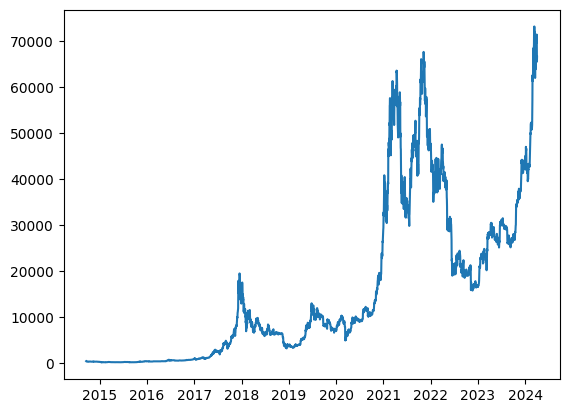

In [51]:
import matplotlib.pyplot as plt

plt.plot(df['Date'],df['Close'])

In [52]:
data = df.copy()

data.index = data.pop('Date')
data.head(3)

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990


In [68]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the training set
X_train, y_train = [], []
for i in range(5, len(train_data)):
    X_train.append(train_data[i-5:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [69]:
X_train.shape

(2784, 5)

In [71]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss="mean_squared_error",
              optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
87/87 [==============================] - 4s 6ms/step - loss: 0.0075
Epoch 2/10
87/87 [==============================] - 1s 6ms/step - loss: 3.6957e-04
Epoch 3/10
87/87 [==============================] - 1s 7ms/step - loss: 3.4768e-04
Epoch 4/10
87/87 [==============================] - 1s 8ms/step - loss: 3.7705e-04
Epoch 5/10
87/87 [==============================] - 1s 9ms/step - loss: 3.4796e-04
Epoch 6/10
87/87 [==============================] - 1s 8ms/step - loss: 3.5021e-04
Epoch 7/10
87/87 [==============================] - 1s 8ms/step - loss: 3.4576e-04
Epoch 8/10
87/87 [==============================] - 1s 9ms/step - loss: 3.6065e-04
Epoch 9/10
87/87 [==============================] - 1s 9ms/step - loss: 3.5559e-04
Epoch 10/10
87/87 [==============================] - 1s 9ms/step - loss: 3.5723e-04


In [56]:
# Make predictions on the test set
X_test = []
for i in range(len(test_data) - 60):
    X_test.append(test_data[i:i+60, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [57]:
predictions = model.predict(X_test)

20/20 [==============================] - 1s 19ms/step


In [58]:
predictions.shape

(638, 1)

In [41]:
y_train

array([0.00287741, 0.00287091, 0.00270343, ..., 0.54207603, 0.49923653,
       0.49190897])

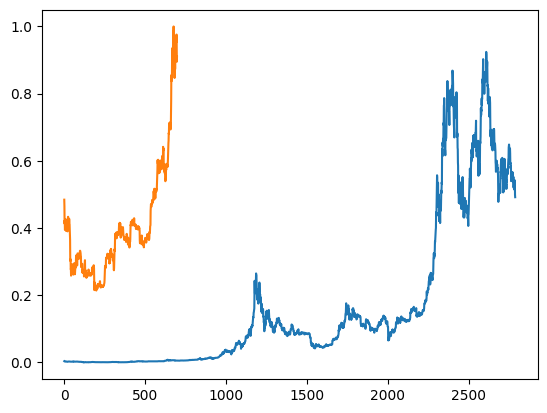

In [61]:
plt.plot(train_data)
plt.plot(test_data)